Installing the required library

In [1]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.8 MB/s 
     |████████████████████████████████| 6.3 MB 40.4 MB/s 
     |████████████████████████████████| 16.7 MB 816 kB/s 


Importing the required library

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Visualizing the Indian map dataset

In [3]:
fp = "drive/MyDrive/Colab Notebooks/polbnda_ind.shp"
map_df = gpd.read_file(fp)
map_df.head()

f_code  coc                nam               laa       pop  ypc adm_code  \
0  FA001  IND  JAMMU AND KASHMIR            GILGIT -99999999    0      UNK   
1  FA001  IND  JAMMU AND KASHMIR  TRIBAL TERRITORY -99999999    0      UNK   
2  FA001  IND  JAMMU AND KASHMIR    GILGIT WAZARAT -99999999    0      UNK   
3  FA001  IND  JAMMU AND KASHMIR            CHILAS -99999999    0      UNK   
4  FA001  IND  JAMMU AND KASHMIR      MUZAFFARABAD -99999999    0      UNK   

  salb  soc                                           geometry  
0  UNK  IND  POLYGON Z ((74.73719 37.02695 0.00000, 74.7445...  
1  UNK  IND  POLYGON Z ((73.13781 35.81256 0.00000, 73.1441...  
2  UNK  IND  POLYGON Z ((75.13574 34.89415 0.00000, 75.0727...  
3  UNK  IND  POLYGON Z ((74.18809 35.66722 0.00000, 74.2342...  
4  UNK  IND  POLYGON Z ((74.08553 35.07817 0.00000, 74.0961...

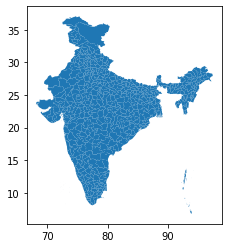

In [4]:
map_df = map_df[['laa', 'geometry']]
map_df.plot()

Checking if it's working for jan21 dataset

In [15]:
df_jan21 = pd.read_csv("drive/MyDrive/Colab Notebooks/jan21.csv")
df_jan21['sub region'] = df_jan21['sub region'].str.upper()

In [6]:
df_jan21.columns

Index(['Unnamed: 0', 'date', 'retail and recreation', 'grocery and pharmacy',
       'parks', 'transit', 'workplaces', 'residential', 'sub region'],
      dtype='object')

In [8]:
retail_recreation_jan21= df_jan21[['retail and recreation', 'sub region']]

In [9]:
retail_recreation_jan21

retail and recreation                sub region
0                      NaN  NORTH AND MIDDLE ANDAMAN
1                12.870968             SOUTH ANDAMAN
2               -22.903226               ANANTAPURAM
3               -19.290323                  CHITTOOR
4               -10.387097             EAST GODAVARI
..                     ...                       ...
622             -26.129032                JALPAIGURI
623             -35.451613                   KOLKATA
624             -13.387097                     MALDA
625             -15.967742               MURSHIDABAD
626             -17.967742                     NADIA

[627 rows x 2 columns]

In [10]:
merged_retail_recreation_jan21 = map_df.set_index('laa').join(retail_recreation_jan21.set_index('sub region'))
merged_retail_recreation_jan21

geometry  \
ADILABAD     POLYGON Z ((78.31348 19.91387 0.00000, 78.3228...   
AGRA         POLYGON Z ((78.19672 27.40297 0.00000, 78.1967...   
AHMADABAD    POLYGON Z ((71.99915 23.50413 0.00000, 72.0055...   
AHMADABAD    POLYGON Z ((72.72363 23.33552 0.00000, 72.7250...   
AHMADABAD    POLYGON Z ((72.30804 22.05516 0.00000, 72.3058...   
...                                                        ...   
WOKHA        POLYGON Z ((94.16468 26.34921 0.00000, 94.1615...   
YAMUNANAGAR  POLYGON Z ((77.32199 30.44907 0.00000, 77.3225...   
YANAM        POLYGON Z ((82.20459 16.74848 0.00000, 82.2150...   
YAVATMAL     POLYGON Z ((78.27604 20.68858 0.00000, 78.2669...   
ZUNHEBOTO    POLYGON Z ((94.36691 26.19277 0.00000, 94.3777...   

             retail and recreation  
ADILABAD                 -9.258065  
AGRA                    -23.451613  
AHMADABAD                      NaN  
AHMADABAD                      NaN  
AHMADABAD                      NaN  
...                            ...  
WOKHA                          NaN  
YAMUNANAGAR                    NaN  
YANAM                          NaN  
YAVATMAL                -22.064516  
ZUNHEBOTO                      NaN  

[1221 rows x 2 columns]

Function to normalize the data

In [11]:
import numpy as np
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [12]:
merged_retail_recreation_jan21['retail and recreation'] = NormalizeData(merged_retail_recreation_jan21['retail and recreation'])*100
merged_retail_recreation_jan21

geometry  \
ADILABAD     POLYGON Z ((78.31348 19.91387 0.00000, 78.3228...   
AGRA         POLYGON Z ((78.19672 27.40297 0.00000, 78.1967...   
AHMADABAD    POLYGON Z ((71.99915 23.50413 0.00000, 72.0055...   
AHMADABAD    POLYGON Z ((72.72363 23.33552 0.00000, 72.7250...   
AHMADABAD    POLYGON Z ((72.30804 22.05516 0.00000, 72.3058...   
...                                                        ...   
WOKHA        POLYGON Z ((94.16468 26.34921 0.00000, 94.1615...   
YAMUNANAGAR  POLYGON Z ((77.32199 30.44907 0.00000, 77.3225...   
YANAM        POLYGON Z ((82.20459 16.74848 0.00000, 82.2150...   
YAVATMAL     POLYGON Z ((78.27604 20.68858 0.00000, 78.2669...   
ZUNHEBOTO    POLYGON Z ((94.36691 26.19277 0.00000, 94.3777...   

             retail and recreation  
ADILABAD                 55.245700  
AGRA                     39.586622  
AHMADABAD                      NaN  
AHMADABAD                      NaN  
AHMADABAD                      NaN  
...                            ...  
WOKHA                          NaN  
YAMUNANAGAR                    NaN  
YANAM                          NaN  
YAVATMAL                 41.116941  
ZUNHEBOTO                      NaN  

[1221 rows x 2 columns]

Function to plot Indian map district wise for each of the parameters

In [13]:
def district_wise_plt(dataset,change,time):
  df = pd.read_csv(dataset)
  df['sub region'] = df['sub region'].str.upper()
  df_filtered= df[[change, 'sub region']]
  df_merged = map_df.set_index('laa').join(df_filtered.set_index('sub region'))
  df_merged[change] = NormalizeData(df_merged[change])*100
  df_merged[change].fillna(df_merged[change].mean(), inplace=True)
  fig, ax = plt.subplots(1, figsize=(12, 8))

  ax.axis('off')
  ax.set_title('District Wise %Mobility change in '+change+' due to Covid19 during '+time, fontdict={'fontsize': '14', 'fontweight' : '3'})
  
  return df_merged.plot(column=change, cmap='YlOrRd', linewidth=0.6, ax=ax, edgecolor='0.6', legend=True)

Required parameters for plotting

In [14]:
dataset_url = ["drive/MyDrive/Colab Notebooks/jan21.csv","drive/MyDrive/Colab Notebooks/q1.csv","drive/MyDrive/Colab Notebooks/q2.csv",
               "drive/MyDrive/Colab Notebooks/q3.csv","drive/MyDrive/Colab Notebooks/jan22.csv"]
change_param = ['retail and recreation', 'grocery and pharmacy',
       'parks', 'transit', 'workplaces', 'residential']
time_interval = ["January 2021","Feb-April 2021","May-July 2021","August-October 2021","November-December 2021"]

Visualizing the Indian Map

AxesSubplot(0.294134,0.125;0.450866x0.755)
AxesSubplot(0.294134,0.125;0.450866x0.755)
AxesSubplot(0.294134,0.125;0.450866x0.755)
AxesSubplot(0.294134,0.125;0.450866x0.755)
AxesSubplot(0.294134,0.125;0.450866x0.755)
AxesSubplot(0.294134,0.125;0.450866x0.755)
AxesSubplot(0.294134,0.125;0.450866x0.755)
AxesSubplot(0.294134,0.125;0.450866x0.755)
AxesSubplot(0.294134,0.125;0.450866x0.755)
AxesSubplot(0.294134,0.125;0.450866x0.755)
AxesSubplot(0.294134,0.125;0.450866x0.755)
AxesSubplot(0.294134,0.125;0.450866x0.755)
AxesSubplot(0.294134,0.125;0.450866x0.755)
AxesSubplot(0.294134,0.125;0.450866x0.755)
AxesSubplot(0.294134,0.125;0.450866x0.755)
AxesSubplot(0.294134,0.125;0.450866x0.755)
AxesSubplot(0.294134,0.125;0.450866x0.755)
AxesSubplot(0.294134,0.125;0.450866x0.755)
AxesSubplot(0.294134,0.125;0.450866x0.755)
AxesSubplot(0.294134,0.125;0.450866x0.755)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


AxesSubplot(0.294134,0.125;0.450866x0.755)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


AxesSubplot(0.294134,0.125;0.450866x0.755)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


AxesSubplot(0.294134,0.125;0.450866x0.755)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


AxesSubplot(0.294134,0.125;0.450866x0.755)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


AxesSubplot(0.294134,0.125;0.450866x0.755)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


AxesSubplot(0.294134,0.125;0.450866x0.755)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


AxesSubplot(0.294134,0.125;0.450866x0.755)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


AxesSubplot(0.294134,0.125;0.450866x0.755)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


AxesSubplot(0.294134,0.125;0.450866x0.755)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


AxesSubplot(0.294134,0.125;0.450866x0.755)


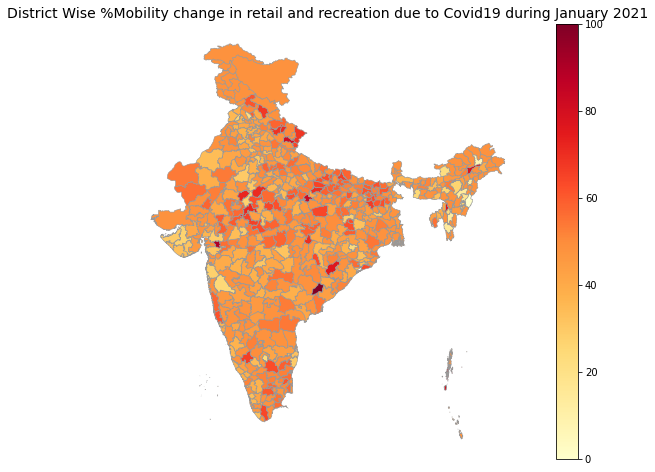

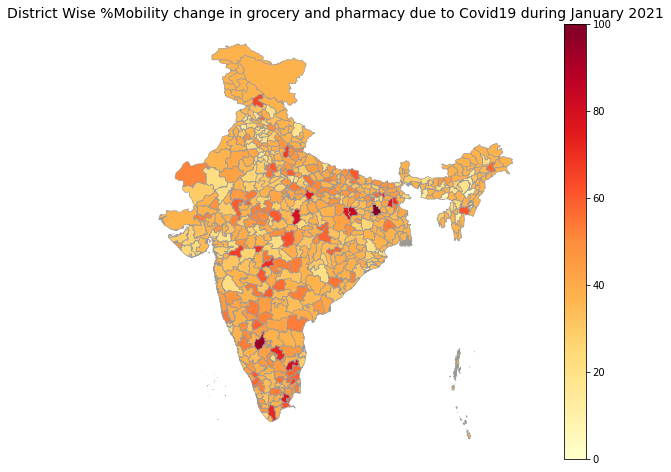

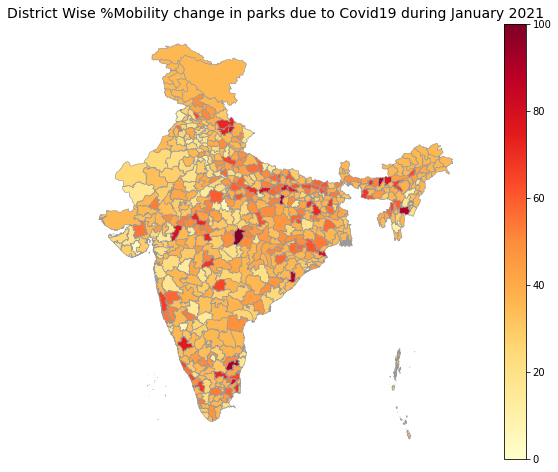

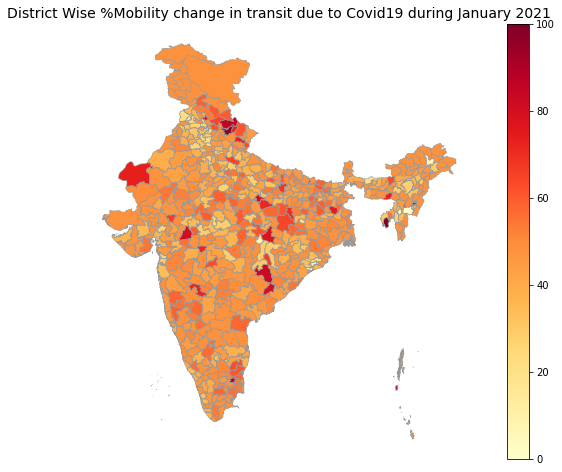

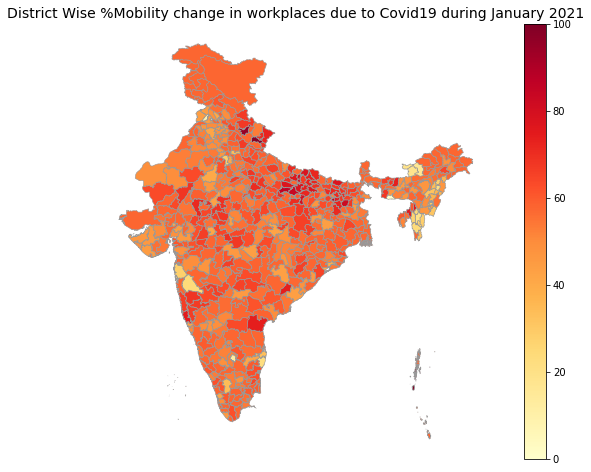

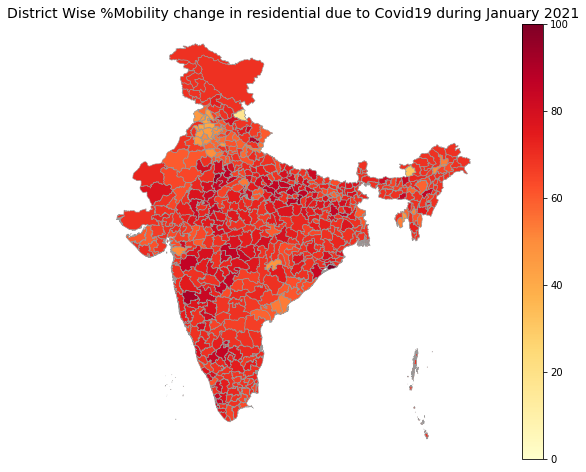

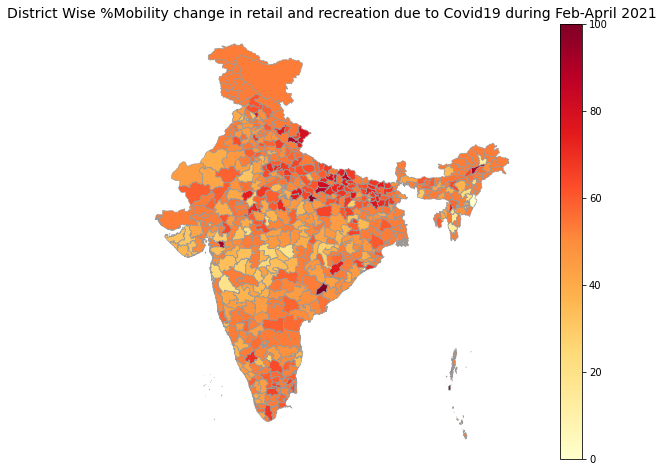

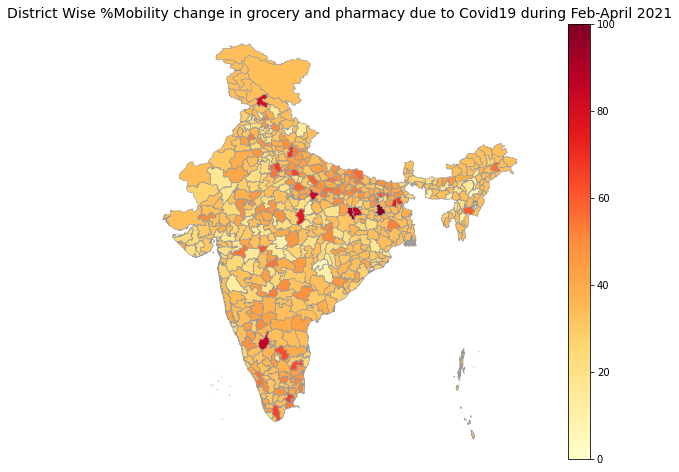

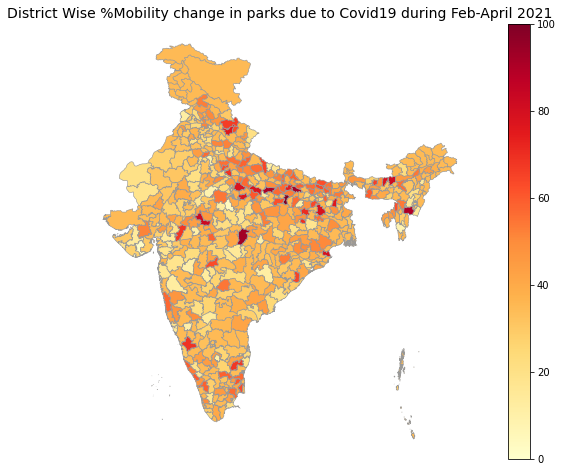

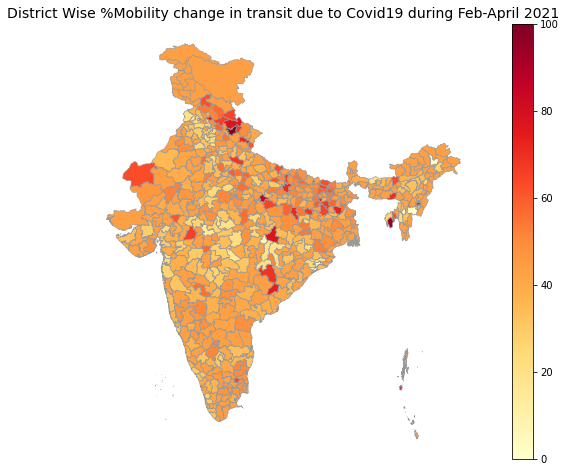

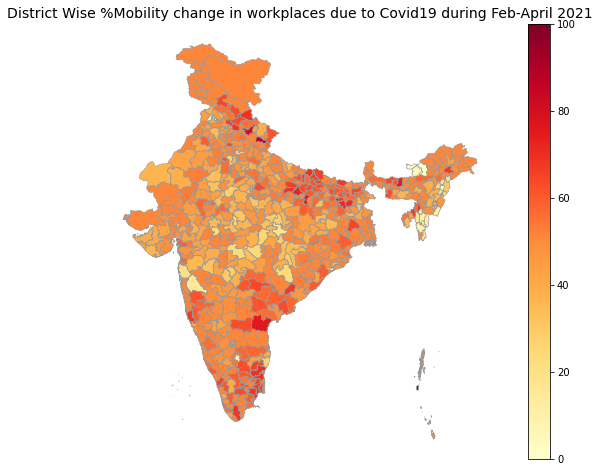

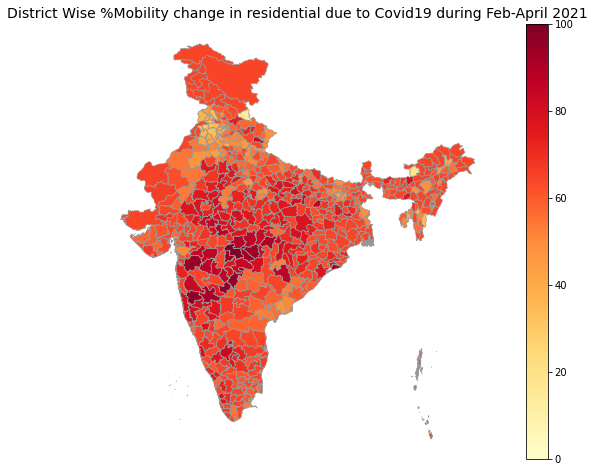

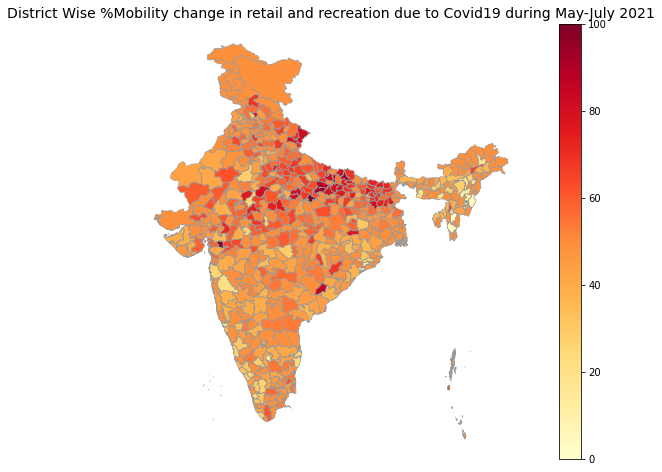

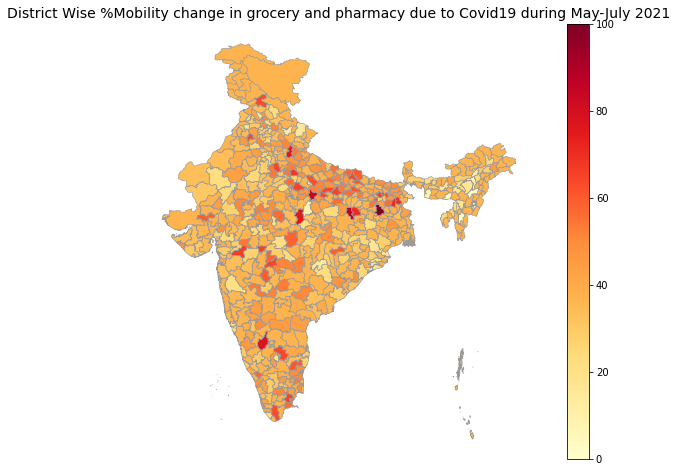

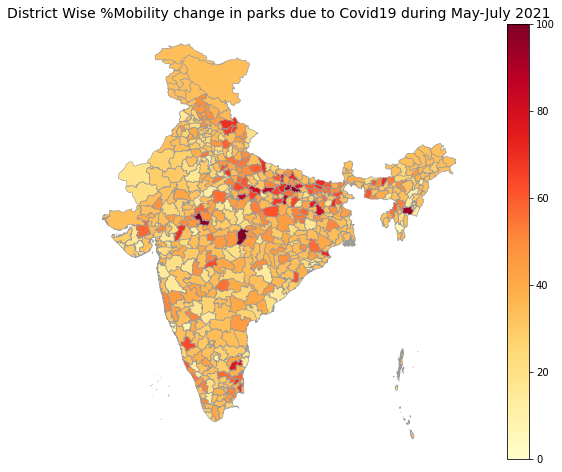

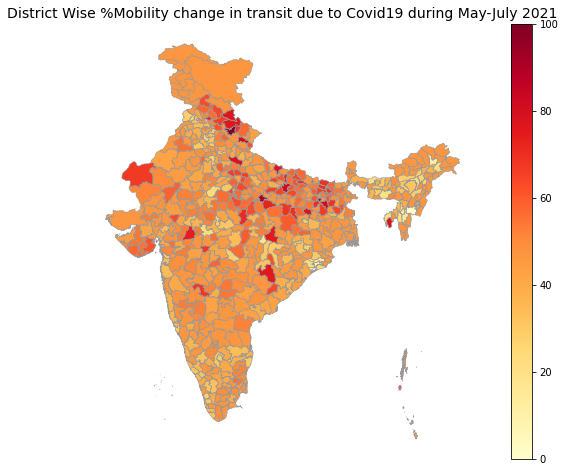

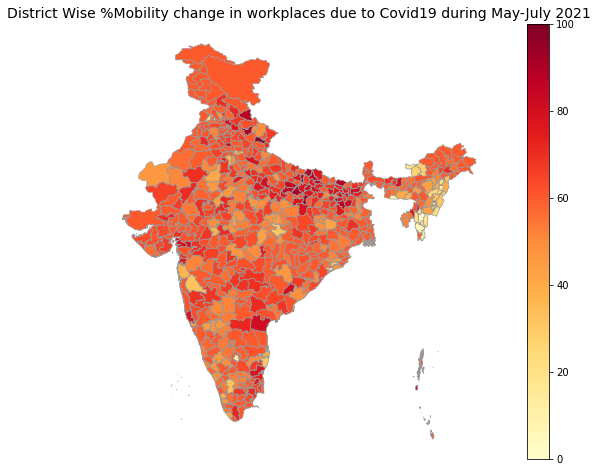

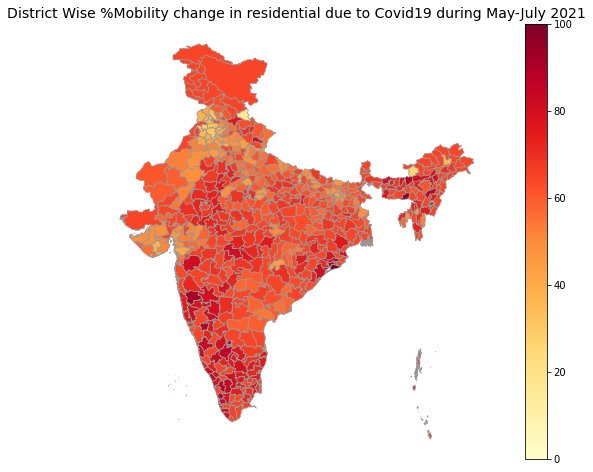

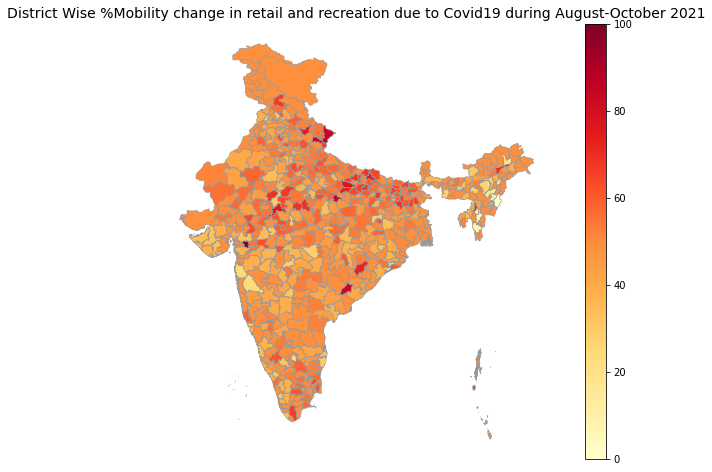

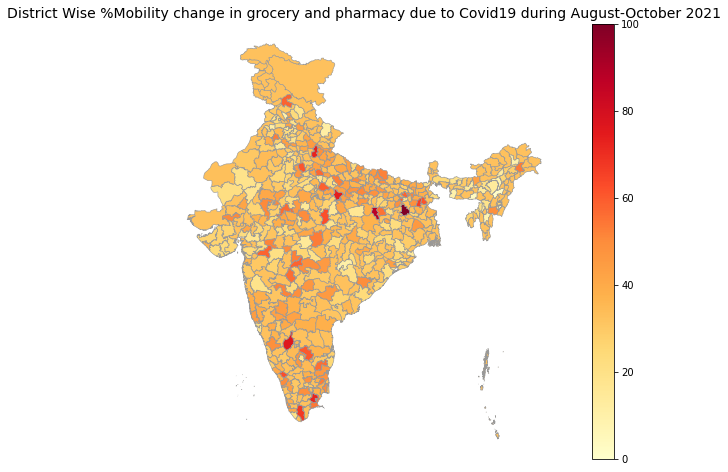

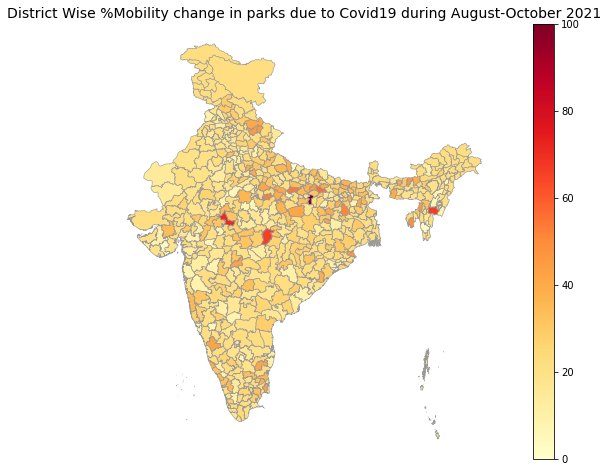

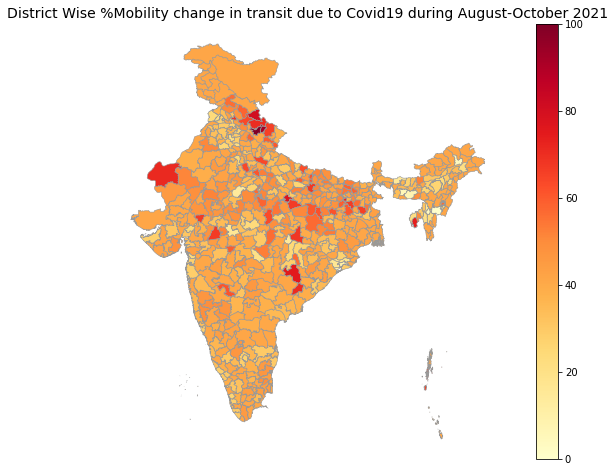

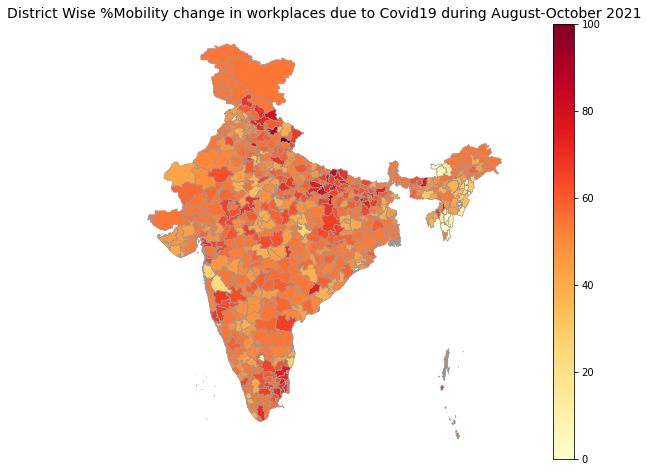

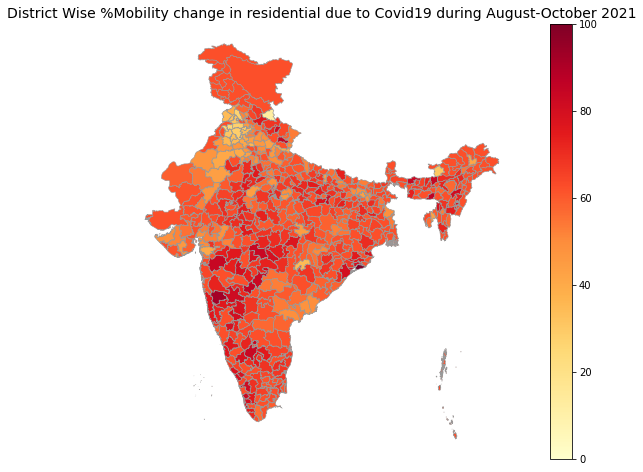

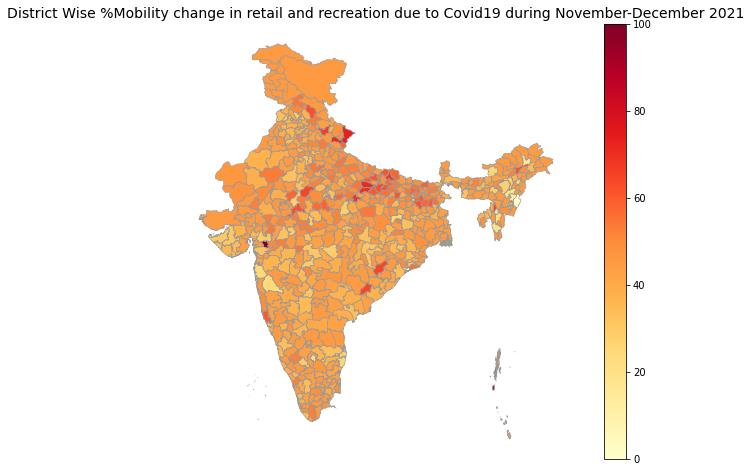

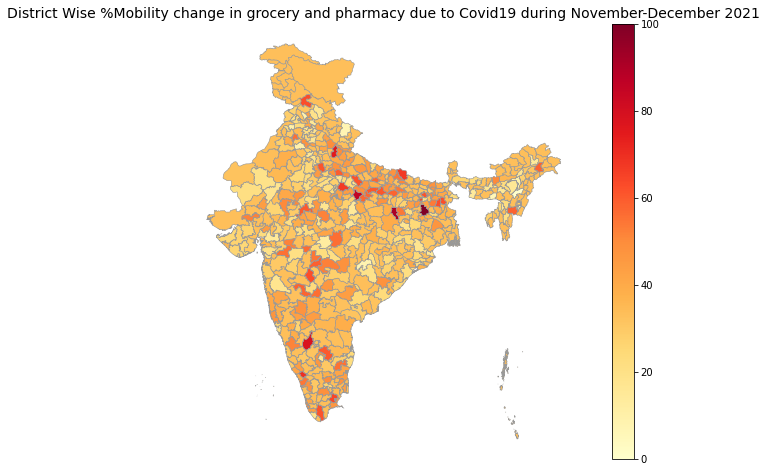

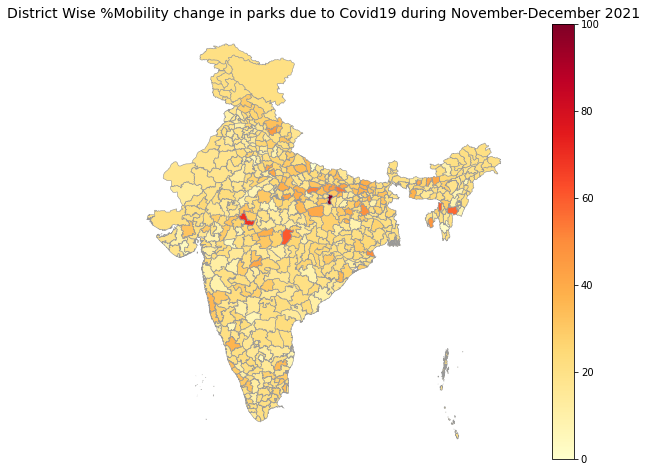

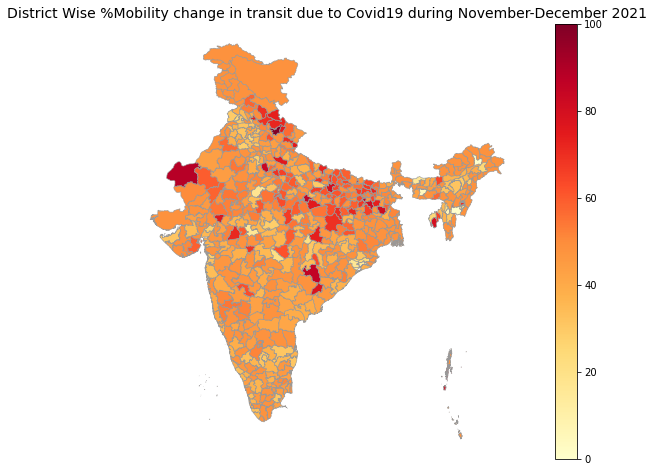

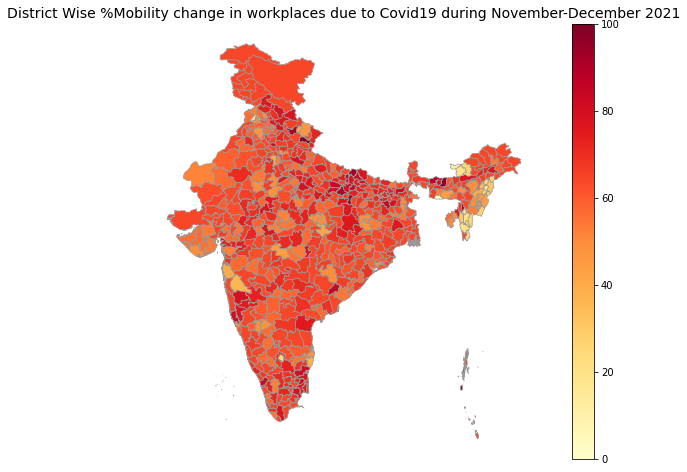

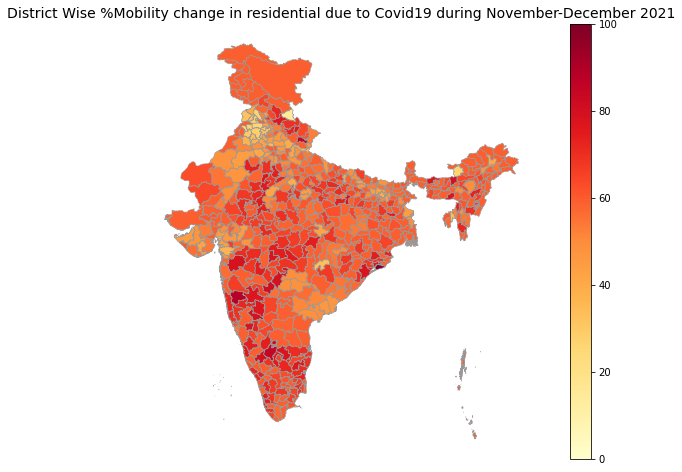

In [ ]:
for i in range(0,len(dataset_url)):
  for j in change_param:
    plot_map = district_wise_plt(dataset_url[i],j,time_interval[i])
    print(plot_map)


Exploratory Data Analysis

In [ ]:
def data_analysis(dataset,change,time):
  df = pd.read_csv(dataset)
  df['sub region'] = df['sub region'].str.upper()
  df_filtered= df[[change, 'sub region']]
  df_merged = map_df.set_index('laa').join(df_filtered.set_index('sub region'))
  df_merged[change] = NormalizeData(df_merged[change])*100
  df_merged[change].fillna(df_merged[change].mean(), inplace=True)
  analysis = list(df_merged.describe()[change])
  analysis = [round(num, 2) for num in analysis]
  return analysis

In [ ]:
df_analysis = pd.DataFrame(columns=['Count','Mean','std','Min', '25%', '50%','75%','Max'])
df_analysis.head()

Empty DataFrame
Columns: [Count, Mean, std, Min, 25%, 50%, 75%, Max]
Index: []

In [ ]:
for i in range(0,len(dataset_url)):
  for j in change_param:
    data_exp = data_analysis(dataset_url[i],j,time_interval[i])
    df_analysis.loc[len(df_analysis)] = data_exp

In [ ]:
df_analysis.head()

Count   Mean    std  Min    25%    50%    75%    Max
0  1221.0  48.28  12.16  0.0  43.54  48.28  50.26  100.0
1  1221.0  37.75   9.89  0.0  33.54  37.75  37.75  100.0
2  1221.0  35.70  12.79  0.0  27.76  35.70  38.44  100.0
3  1221.0  48.30  12.67  0.0  42.60  48.30  48.61  100.0
4  1221.0  57.77  13.90  0.0  53.61  57.77  58.59  100.0

In [ ]:
Duration = []
for i in range(0,6):
  Duration.extend(time_interval)

#df_analysis["Duration"] = Duration
#first_column = df_analysis.pop('Duration')
  
# insert column using insert(position,column_name,
# first_column) function
#df_analysis.insert(0, 'Duration', first_column)
df_analysis.head()

Count   Mean    std  Min    25%    50%    75%    Max
0  1221.0  48.28  12.16  0.0  43.54  48.28  50.26  100.0
1  1221.0  37.75   9.89  0.0  33.54  37.75  37.75  100.0
2  1221.0  35.70  12.79  0.0  27.76  35.70  38.44  100.0
3  1221.0  48.30  12.67  0.0  42.60  48.30  48.61  100.0
4  1221.0  57.77  13.90  0.0  53.61  57.77  58.59  100.0

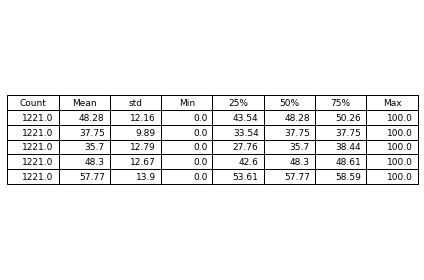

In [ ]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')


ax.table(cellText=df_analysis.iloc[0:5,:].values, colLabels=df_analysis.columns, loc='center')

fig.tight_layout()

plt.show()

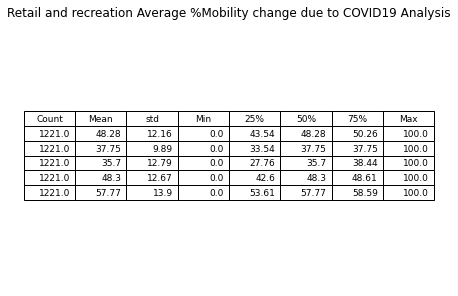

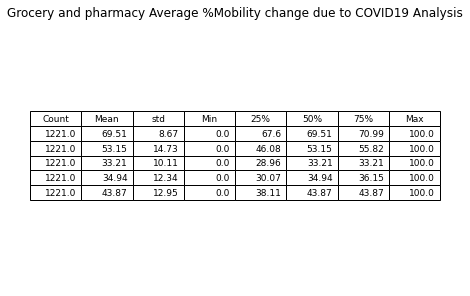

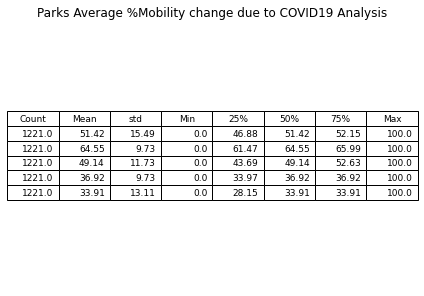

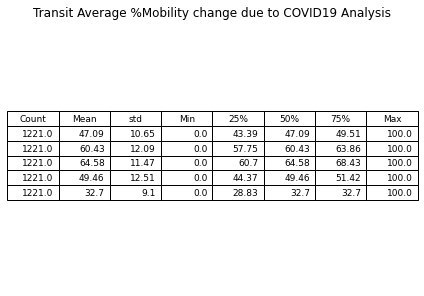

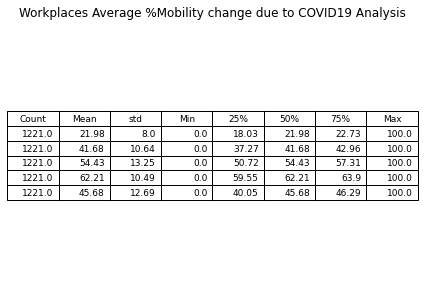

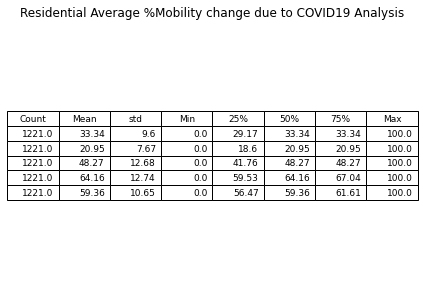

In [ ]:
mul_5 = [0,5,10,15,20,25]
for i in range(0,len(mul_5)):
  fig, ax = plt.subplots()

  fig.patch.set_visible(True)
  ax.axis('off')
  ax.axis('tight')
  ax.table(cellText=df_analysis.iloc[0+mul_5[i]:5+mul_5[i],:].values, colLabels=df_analysis.columns, loc='center')
  fig.tight_layout()
  plt.title(change_param[i].capitalize() + ' Average %Mobility change due to COVID19 Analysis')
  plt.show()